# Librerías


In [1]:
# Librería para importar el dataset
from sklearn import datasets

# Para separar el conjunto de datos en entrenamiento y testeo
from sklearn.model_selection import train_test_split

# Modelos
from sklearn import linear_model  # Regresión logística
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn import svm  # SVM

# Evaluación de los modelos
from sklearn.metrics import accuracy_score  # Precisión
from sklearn.metrics import confusion_matrix  # Matriz de confusión

# Graficar
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [2]:
# Cargar dataset de cáncer de mama
cancer = datasets.load_breast_cancer()


In [3]:
# Dimensiones del dataset
# El dataset tiene 569 filas y 30 columnas (según la imagen)
cancer.data.shape


(569, 30)

In [4]:
cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
print(len(cancer.data))
print(len(cancer.target))


569
569


# Regresión logística


In [7]:
x = cancer.data
y = cancer.target


In [8]:
# Dividimos el dataset en conjunto de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [9]:
modelo_rl = linear_model.LogisticRegression()  # Creación del modelo
modelo_rl.fit(x_train, y_train)  # Ajustamos el modelo


C:\Users\INMORTAL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
prediccion_rl = modelo_rl.predict(x_test)  # Hacemos la predicción


In [11]:
as_rl = accuracy_score(prediccion_rl, y_test)
as_rl


0.935672514619883

In [12]:
# Matriz de confusión
matriz_rl = confusion_matrix(y_test, prediccion_rl)
print(matriz_rl)


[[ 55   7]
 [  4 105]]


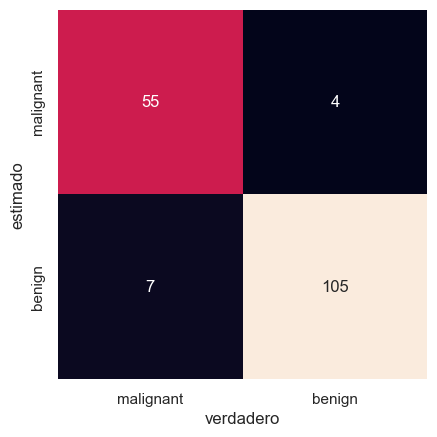

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.heatmap(matriz_rl.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('verdadero')
plt.ylabel('estimado')
plt.show()


In [14]:
# Creación y ajuste del modelo
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
# Predicción
prediccion_knn = modelo_knn.predict(x_test)

In [16]:
# Medimos la precisión del modelo
as_knn = accuracy_score(prediccion_knn, y_test)
as_knn

0.9239766081871345

In [17]:
# Matriz de confusión
matriz_knn = confusion_matrix(y_test, prediccion_knn)
print(matriz_knn)

[[ 53   9]
 [  4 105]]


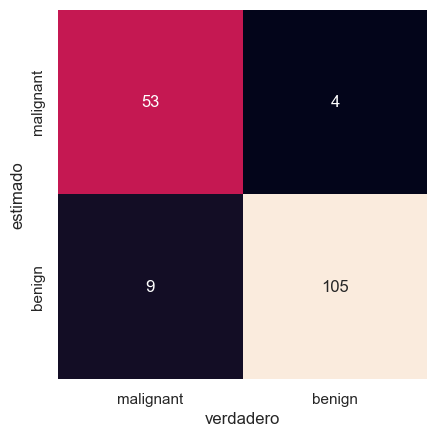

In [18]:
# Heatmap de la matriz de confusión
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(matriz_knn.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('verdadero')
plt.ylabel('estimado')
plt.show()

In [19]:
#svm

In [20]:
# Creación del modelo y ajuste
modelo_svm = svm.SVC(kernel='poly', degree=2)
modelo_svm.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [21]:
# Predicción
prediccion_svm = modelo_svm.predict(x_test)

In [22]:
# Medimos la precisión del modelo
as_svm = accuracy_score(prediccion_svm, y_test)
as_svm

0.9005847953216374

In [23]:
# Matriz de confusión
matriz_svm = confusion_matrix(y_test, prediccion_svm)
print(matriz_svm)

[[ 48  14]
 [  3 106]]


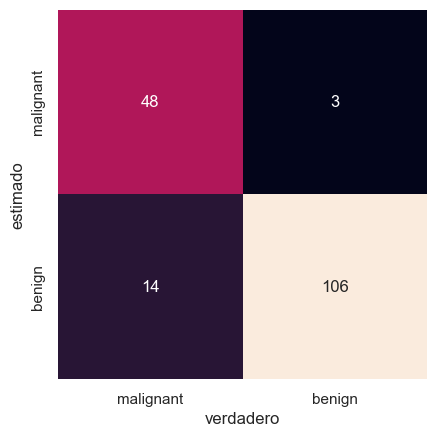

In [24]:
# Heatmap de la matriz de confusión
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(matriz_svm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('verdadero')
plt.ylabel('estimado')
plt.show()

In [25]:
#leave one out validtaion 

In [26]:
# Validación Leave-One-Out (LOO) con SVM (celda autocontenida)
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn import datasets, svm

# Asegurar datos y modelo aunque el kernel se haya reiniciado
try:
    modelo_svm
    x; y
except NameError:
    cancer = datasets.load_breast_cancer()
    x = cancer.data
    y = cancer.target
    modelo_svm = svm.SVC(kernel='poly', degree=2)

leave_val = LeaveOneOut()
# Nota: LOO hace 569 ajustes; n_jobs=-1 paraleliza si tu entorno lo permite
result_leave = cross_val_score(modelo_svm, x, y, cv=leave_val, n_jobs=-1)

print(f"LOO - accuracy media: {result_leave.mean():.4f} (+/- {result_leave.std():.4f})")

LOO - accuracy media: 0.9104 (+/- 0.2857)
